In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import os
print(os.getcwd())

C:\Users\Varsha M K


In [3]:
df = pd.read_csv('C:/Users/Varsha M K/fraud_detection_project/dataset/PS_20174392719_1491204439457_log.csv')


In [4]:
#basic info abt dataset
print("Dataset Shape:", df.shape)
df.info

Dataset Shape: (6362620, 11)


<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [5]:
#check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#count fraud vs non fraud transcations
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

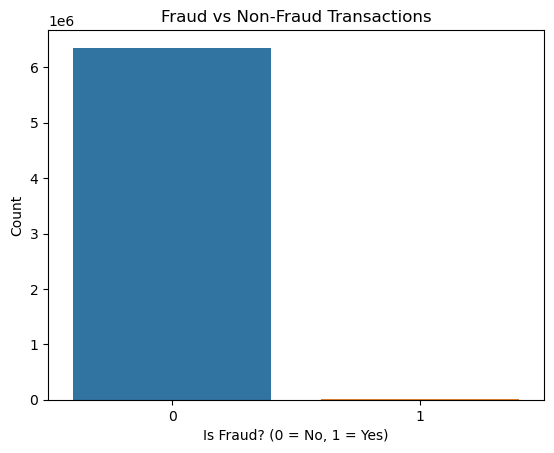

In [7]:
#visualize fraud distribution
sns.countplot(data=df, x='isFraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [8]:
# Data Cleaning + Preprocessing
#Drop irrelevant columns (like names)
#Encode categorical column (type)
#Select only useful features

In [9]:
#Check Unique Transaction Types
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
#Drop Irrelevant Columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [11]:
# Convert 'type' column into numeric format using one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# See updated dataframe
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [12]:
#y = fraud status (1 = fraud, 0 = not fraud)
#X = all other useful features like amount, balances, type_CASH_OUT, etc.
#You’re splitting your data into:
#Inputs: X
#Output: y

In [13]:
# Set the target column (what we want to predict)
y = df['isFraud']

# Set the input features (drop the target column)
X = df.drop('isFraud', axis=1)

# Check the shapes
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (6362620, 11)
Shape of y (target): (6362620,)


In [14]:
#Train & Evaluate the ML Model .We’ll use Random Forest

In [15]:
#Split Data into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5090096, 11)
Testing set size: (1272524, 11)


In [17]:
#class_weight='balanced' helps the model not ignore the rare fraud cases (since the data is imbalanced)

In [ ]:
#Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Create the model (add class_weight to handle imbalance)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Train the model
model.fit(X_train, y_train)

In [ ]:
#Make Predictions & Evaluate

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))